In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

notebook_path = os.getcwd()
weights_file_path=f"{notebook_path}/c01_1_polynomial_single_feature_training_and_testing_weights.npy"

In [2]:
# Datasets path
# auto
csv_train_path = f"{notebook_path}/data/auto-train-preprocessed.csv"
csv_test_path = f"{notebook_path}/data/auto-test-preprocessed.csv"

In [3]:
def polynomial(x,degree_of_polynomial):
    phi_x = np.array([x**i for i in range(degree_of_polynomial+1)])
    phi_x = phi_x[..., 0].T
    return phi_x

In [4]:
def load_csv_as_augmented(csv_path,degree_of_polynomial):
    assert os.path.exists(csv_path), "File not exists, "+ csv_path
    df=pd.read_csv(csv_path)
    print(f"Loaded Data:")
    print(df)
    print(df.columns)
    # d=np.array(df)[:,1:]
    d=np.array(df)[:,:]
    x=d[:,:-1]
    # x_aug=np.hstack((np.ones((x.shape[0],1)),x))
    x_aug=polynomial(x,degree_of_polynomial )
    y=d[:,-1:]
    print(f"x_aug.shape: {x_aug.shape}, y.shape: {y.shape}")
    return x,x_aug,y

In [5]:
def linear_regression(x,w):
    # y_hat=0
    # for xi,wi in zip(x.T,w):
    #     y_hat+=xi*wi
    y_hat = x @ w
    return y_hat

In [6]:
def fn_mae(y_hat,y):
    return np.mean(np.abs(y_hat-y))
def fn_mse(y_hat,y):
    return np.mean((y_hat-y)**2)
def fn_rmse(y_hat,y):
    return np.sqrt(fn_mse(y_hat,y))
def fn_r2(y_hat,y):
    r2=1-np.sum((y_hat-y)**2)/np.sum((y.mean()-y)**2)
    return r2

In [7]:
def use_grad_mse(x, y, y_hat, w, eta):
    # Not good
    # for i in range(w.shape[0]):
    #     # print(i)
    #     g = 2 * np.mean(x[:, i] * (y_hat - y))
    #     w[i] -= eta*g

    # Better
    # grads = []
    # for xi in x.T:
    #     grads.append(2 * np.mean(xi * (y_hat - y)))
    
    # grads = np.array(grads)
    # grads = grads.reshape(-1, 1)
    # # print(f"grads.shape1: {grads.shape}")
    
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0]    
    grads=grads
    # print(f"grads.shape2: {grads.shape}")
    w -= eta * grads
    return w

In [8]:
def gradient_decent(x, y, eta, epochs,degree_of_polynomial):
    e_mae_list = []
    e_mse_list = []
    # w = np.random.random(x.shape[1])
    w = np.random.randn(degree_of_polynomial+1,1)
    print(f"w.shape: {w.shape}")
    for epoch in range(epochs):
        y_hat = linear_regression(x, w)

        e_mae = fn_mae(y_hat, y)
        e_mae_list.append(e_mae)

        e_mse = fn_mse(y_hat, y)
        e_mse_list.append(e_mse)

        if epoch % 100 == 0 or epoch < 10 or epoch > epochs - 10:
            # print(f"epoch {epoch},\tE_MAE:{e_mae:.4f},\tE_MSE:{e_mse:.4f},\tw:{w}")
            print(f"epoch {epoch},\tE_MAE:{e_mae:.4f},\tE_MSE:{e_mse:.4f}")

        # loss function MSE
        # print(x.shape, y.shape, y_hat.shape)
        w = use_grad_mse(x, y, y_hat, w, eta)
    y_hat = linear_regression(x, w)
    e_mae = fn_mae(y_hat, y)
    e_mae_list.append(e_mae)

    e_mse = fn_mse(y_hat, y)
    e_mse_list.append(e_mse)

    print(f"Final    \tE_MAE:{e_mae:.4f},\tE_MSE:{e_mse:.4f},\tw:{w}")
    info = {
        "weights": w,  # Not necessary
        "last_e_mae": e_mae,
        "e_mae_list": e_mae_list,
        "last_e_mse": e_mse,
        "e_mse_list": e_mse_list,
    }
    return w, info

In [9]:
# Hyper parameters
epochs = 2000
eta = 0.1
degree_of_polynomial=3


In [10]:
# load train data
print("train: ", end="\t")
x_train,x_aug_train, y_train = load_csv_as_augmented(csv_train_path,degree_of_polynomial)

train: 	Loaded Data:
     HorsePower       MPG
0      0.038043  0.638298
1      0.646739  0.106383
2      0.157609  0.398936
3      0.239130  0.239362
4      0.728261  0.186170
..          ...       ...
347    0.293478  0.390957
348    0.130435  0.651596
349    0.347826  0.226064
350    0.277174  0.396277
351    0.163044  0.577128

[352 rows x 2 columns]
Index(['HorsePower', 'MPG'], dtype='object')
x_aug.shape: (352, 4), y.shape: (352, 1)


(352, 4)


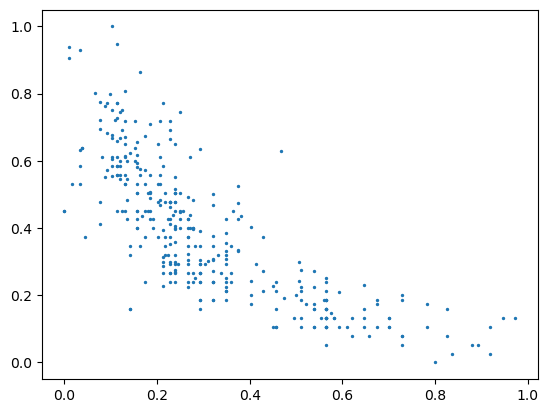

In [11]:
# Visualize
# plt.scatter(x_aug_train[:,0],y_train)

print(x_aug_train.shape)
plt.scatter(x_aug_train[:, 1], y_train,s=2)
# plt.scatter(x_aug_train[:,2],y_train)
# ...

In [12]:
# For test
w = np.random.random(x_aug_train.shape[1])
y_hat_train_no_trained = linear_regression(x_aug_train, w)
print(f"y_hat_train_no_trained.shape: {y_hat_train_no_trained.shape}")
print(f"MAE: {fn_mae(y_hat_train_no_trained,y_train):.4f}")
print(f"MSE: {fn_mse(y_hat_train_no_trained,y_train):.4f}")

y_hat_train_no_trained.shape: (352,)
MAE: 0.7063
MSE: 0.5733


In [13]:
# Training
weights, info = gradient_decent(x_aug_train, y_train, eta, epochs,degree_of_polynomial)
print(f"weights: {weights}")
print(f"Error MAE on train: {info["last_e_mae"]:.4f}")
print(f"Error MSE on train: {info["last_e_mse"]:.4f}")

# Save weights
np.save(weights_file_path,weights)
print(f"Weights saved in: {"c01_training_and_testing_weights.npy"} ")
# print(f"Weights saved in:{weights_file_path}")


w.shape: (4, 1)
epoch 0,	E_MAE:0.6445,	E_MSE:0.4780
epoch 1,	E_MAE:0.4977,	E_MSE:0.3018
epoch 2,	E_MAE:0.3871,	E_MSE:0.1959
epoch 3,	E_MAE:0.3089,	E_MSE:0.1323
epoch 4,	E_MAE:0.2552,	E_MSE:0.0939
epoch 5,	E_MAE:0.2189,	E_MSE:0.0707
epoch 6,	E_MAE:0.1951,	E_MSE:0.0565
epoch 7,	E_MAE:0.1799,	E_MSE:0.0478
epoch 8,	E_MAE:0.1701,	E_MSE:0.0423
epoch 9,	E_MAE:0.1634,	E_MSE:0.0389
epoch 100,	E_MAE:0.1034,	E_MSE:0.0173
epoch 200,	E_MAE:0.0982,	E_MSE:0.0160
epoch 300,	E_MAE:0.0967,	E_MSE:0.0157
epoch 400,	E_MAE:0.0957,	E_MSE:0.0155
epoch 500,	E_MAE:0.0948,	E_MSE:0.0153
epoch 600,	E_MAE:0.0940,	E_MSE:0.0151
epoch 700,	E_MAE:0.0933,	E_MSE:0.0150
epoch 800,	E_MAE:0.0926,	E_MSE:0.0149
epoch 900,	E_MAE:0.0921,	E_MSE:0.0147
epoch 1000,	E_MAE:0.0916,	E_MSE:0.0146
epoch 1100,	E_MAE:0.0911,	E_MSE:0.0146
epoch 1200,	E_MAE:0.0907,	E_MSE:0.0145
epoch 1300,	E_MAE:0.0904,	E_MSE:0.0144
epoch 1400,	E_MAE:0.0901,	E_MSE:0.0144
epoch 1500,	E_MAE:0.0899,	E_MSE:0.0143
epoch 1600,	E_MAE:0.0896,	E_MSE:0.0143
epoch 170

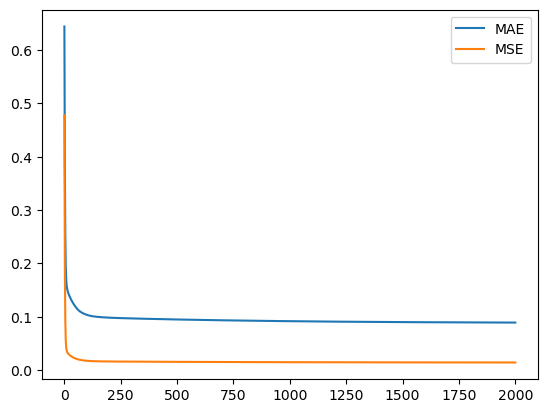

In [14]:
# Plot learning curve
plt.plot(info["e_mae_list"], label="MAE")
plt.plot(info["e_mse_list"], label="MSE")
plt.legend()

In [15]:
# load test data
print("\ntest: ", end="\t")
x_test,x_aug_test, y_test = load_csv_as_augmented(csv_test_path,degree_of_polynomial)


test: 	Loaded Data:
    HorsePower       MPG
0     0.673913  0.159574
1     0.135870  0.609043
2     1.000000  0.186170
3     0.130435  0.678191
4     0.211957  0.319149
5     0.130435  0.664894
6     0.103261  0.744681
7     0.293478  0.239362
8     0.010870  0.914894
9     0.510870  0.226064
10    0.260870  0.345745
11    0.972826  0.132979
12    0.103261  0.845745
13    0.347826  0.255319
14    0.701087  0.106383
15    0.141304  0.465426
16    0.277174  0.239362
17    0.277174  0.372340
18    0.277174  0.345745
19    0.782609  0.159574
20    0.972826  0.079787
21    0.565217  0.132979
22    0.293478  0.212766
23    0.918478  0.132979
24    0.565217  0.159574
25    0.157609  0.622340
26    0.483696  0.244681
27    0.347826  0.289894
28    0.157609  0.718085
29    0.673913  0.106383
30    0.347826  0.159574
31    0.347826  0.332447
32    0.228261  0.239362
33    0.065217  0.718085
34    0.266304  0.398936
35    0.228261  0.505319
36    0.293478  0.265957
37    0.195652  0.585106
38  

In [16]:
# Load weights
weights_loaded=np.load(weights_file_path)
print(f"weights_loaded:\t{weights_loaded}")

weights_loaded:	[[ 0.7000183 ]
 [-1.1966247 ]
 [ 0.22046532]
 [ 0.36806844]]


In [17]:
# Testing
y_hat_train = linear_regression(x_aug_train, weights_loaded)
print(f"Error MAE on train: \t{fn_mae(y_hat_train,y_train):.4f}")
print(f"Error MSE on train: \t{fn_mse(y_hat_train,y_train):.4f}")
print(f"Error RMSE on train: \t{fn_rmse(y_hat_train,y_train):.4f}")
print(f"Error R2 on train: \t{fn_r2(y_hat_train,y_train):.4f}")
print()
y_hat_test = linear_regression(x_aug_test, weights_loaded)
print(f"Error MAE on test: \t{fn_mae(y_hat_test,y_test):.4f}")
print(f"Error MSE on test: \t{fn_mse(y_hat_test,y_test):.4f}")
print(f"Error RMSE on test: \t{fn_rmse(y_hat_test,y_test):.4f}")
print(f"Error R2 on test: \t{fn_r2(y_hat_test,y_test):.4f}")

Error MAE on train: 	0.0890
Error MSE on train: 	0.0141
Error RMSE on train: 	0.1189
Error R2 on train: 	0.6627

Error MAE on test: 	0.0878
Error MSE on test: 	0.0121
Error RMSE on test: 	0.1101
Error R2 on test: 	0.7685


(100, 1) (100, 1) (4, 1)
0.06811203327542222 0.7000182962976871


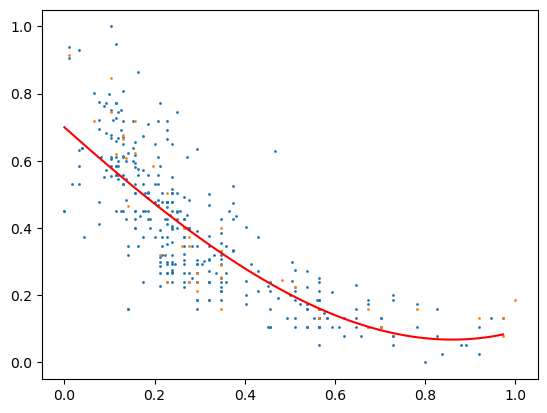

In [18]:
# Visualize using mean of data
# Best result on simple data

plt.scatter(x_train, y_train, s=1)
plt.scatter(x_test, y_test, s=1)

# x_total = np.vstack((x_train, x_test))
# # x_total = np.sort(x_total, axis=0)
# # x_aug_total = np.vstack((x_aug_train, x_aug_test))


# # x_aug=np.hstack((np.ones((x.shape[0],1)),x))
# x_aug_total=np.array([x_total**i for i in range(degree_of_polynomial+1)])
# x_aug_total=x_aug_total[...,0].T

x_total = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
x_aug_total = polynomial(x_total,degree_of_polynomial)

y_hat_total = linear_regression(x_aug_total, weights_loaded)
# x_new=np.linspace(x_total.min(),x_total.max(),100)
# y_hat_total = linear_regression(x_new, weights_loaded)
print(x_total.shape,y_hat_total.shape,weights_loaded.shape)
print(y_hat_total.min(),y_hat_total.max())
plt.plot(x_total.flatten().tolist(), y_hat_total.tolist(), c="red")